In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk import FreqDist


def most_frequent_actions(plans, n):
    actions = np.concatenate(plans)
    counter = FreqDist(actions)
    return pd.DataFrame(counter.most_common(n), columns=["action", "count"])


def most_frequent_objects(plans, n):
    objects = np.concatenate(
        plans.apply(lambda plan:
                    np.concatenate([action.split()[1:]
                    for action in plan]))
    )
    counter = FreqDist(objects)
    return pd.DataFrame(counter.most_common(n), columns=["object", "count"])

In [2]:
TRAIN_URL = "https://www.famaf.unc.edu.ar/~nocampo043/training-instances.parquet.gzip"
TEST_URL = "https://www.famaf.unc.edu.ar/~nocampo043/evaluation-instances.parquet.gzip"

df_train = pd.read_parquet(TRAIN_URL)
df_test = pd.read_parquet(TEST_URL)
df_train["type_of_instance"] = "training"
df_test["type_of_instance"] = "testing"
df = pd.concat([df_train, df_test], ignore_index=True)

## Common length of the plans

<AxesSubplot:xlabel='plan_length', ylabel='count'>

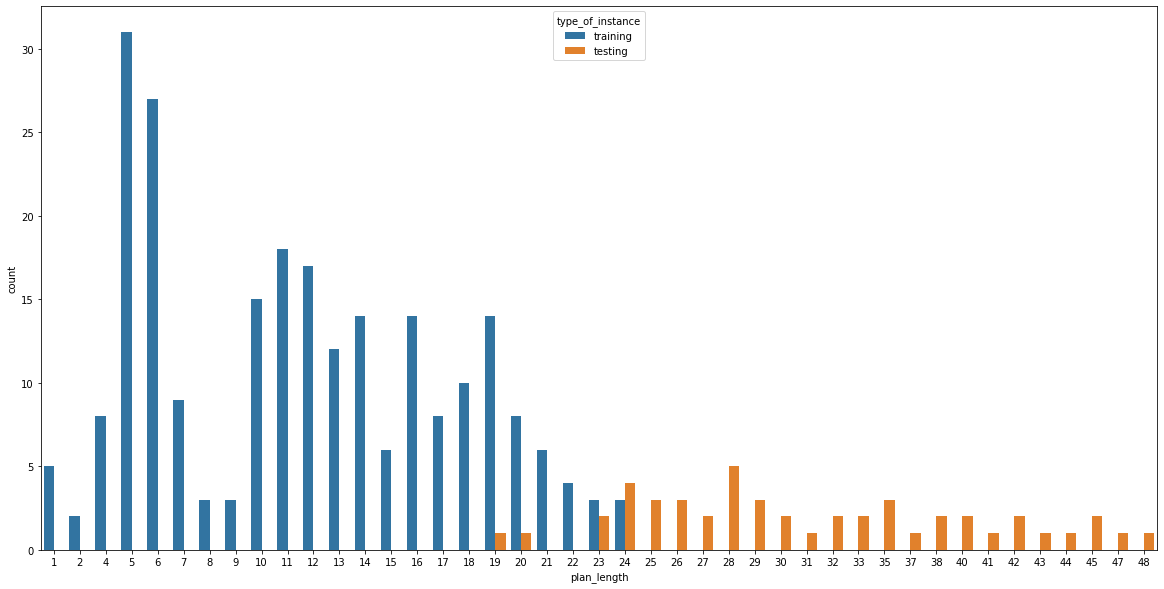

In [3]:
df["plan_length"] = df["relaxed_plan"].apply(lambda plan: len(plan))
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="plan_length", hue="type_of_instance")

## Frequent actions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'switch_on instrument0 satellite0'),
  Text(1, 0, 'switch_on instrument1 satellite0'),
  Text(2, 0, 'switch_on instrument2 satellite1'),
  Text(3, 0, 'switch_on instrument1 satellite1'),
  Text(4, 0, 'switch_on instrument2 satellite0'),
  Text(5, 0, 'switch_on instrument3 satellite1'),
  Text(6, 0, 'switch_on instrument4 satellite1'),
  Text(7, 0, 'switch_on instrument4 satellite2'),
  Text(8, 0, 'switch_on instrument5 satellite2'),
  Text(9, 0, 'switch_on instrument3 satellite2'),
  Text(10, 0, 'switch_on instrument6 satellite2'),
  Text(11, 0, 'calibrate satellite0 instrument0 star0'),
  Text(12, 0, 'calibrate satellite0 instrument0 star8'),
  Text(13, 0, 'calibrate satellite0 instrument0 star3'),
  Text(14, 0, 'switch_on instrument3 satellite0'),
  Text(15, 0, 'calibrate satellite0 instrument0 star7'),
  Text(16, 0, 'calibrate satellite0 instrument0 star

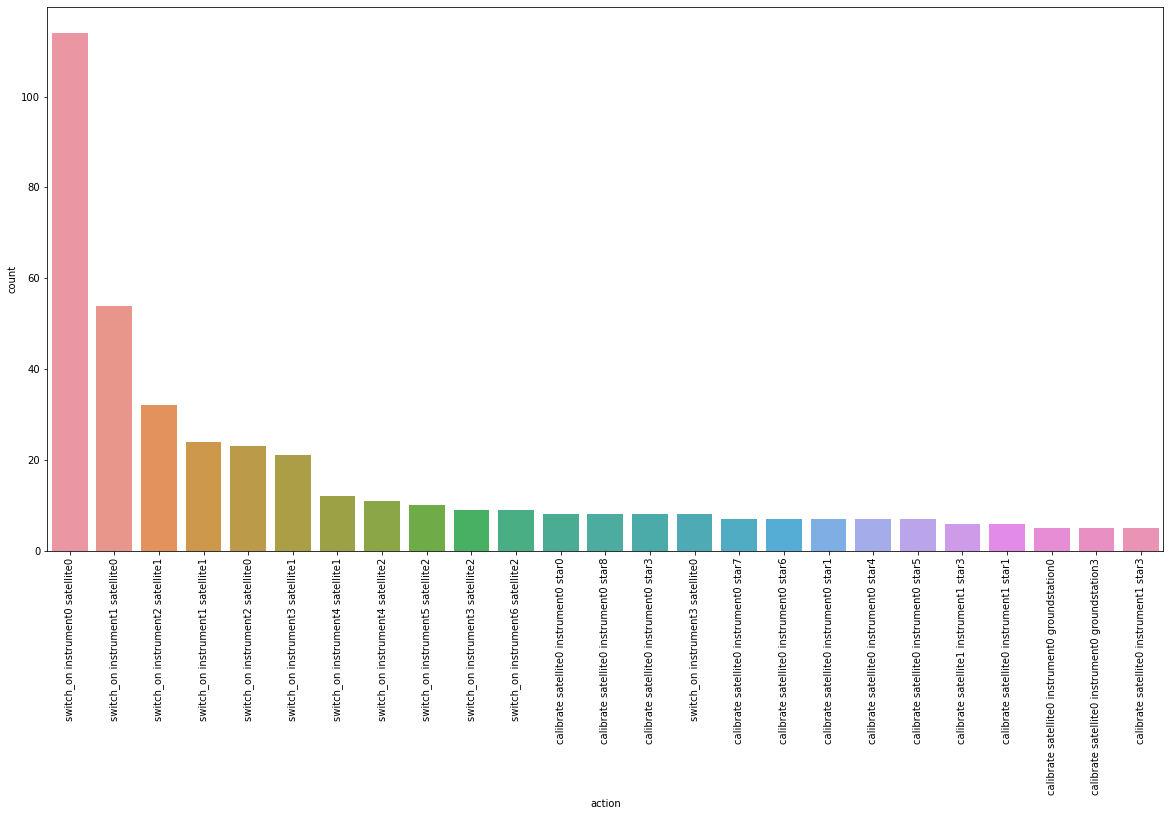

In [4]:
plt.figure(figsize=(20, 10))
sns.barplot(data=most_frequent_actions(df_train["relaxed_plan"], 25),
            x="action",
            y="count")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'switch_on instrument0 satellite0'),
  Text(1, 0, 'switch_on instrument1 satellite0'),
  Text(2, 0, 'switch_on instrument2 satellite0'),
  Text(3, 0, 'switch_on instrument3 satellite0'),
  Text(4, 0, 'switch_on instrument4 satellite0'),
  Text(5, 0, 'switch_on instrument5 satellite1'),
  Text(6, 0, 'switch_on instrument4 satellite1'),
  Text(7, 0, 'switch_on instrument8 satellite2'),
  Text(8, 0, 'switch_on instrument8 satellite1'),
  Text(9, 0, 'switch_on instrument4 satellite2'),
  Text(10, 0, 'switch_on instrument10 satellite3'),
  Text(11, 0, 'switch_on instrument18 satellite5'),
  Text(12, 0, 'switch_on instrument19 satellite6'),
  Text(13, 0, 'switch_on instrument10 satellite4'),
  Text(14, 0, 'switch_on instrument11 satellite4'),
  Text(15, 0, 'switch_on instrument2 satellite1'),
  Text(16, 0, 'switch_on instrument3 satellite1'),
  Text(17, 0, 'switc

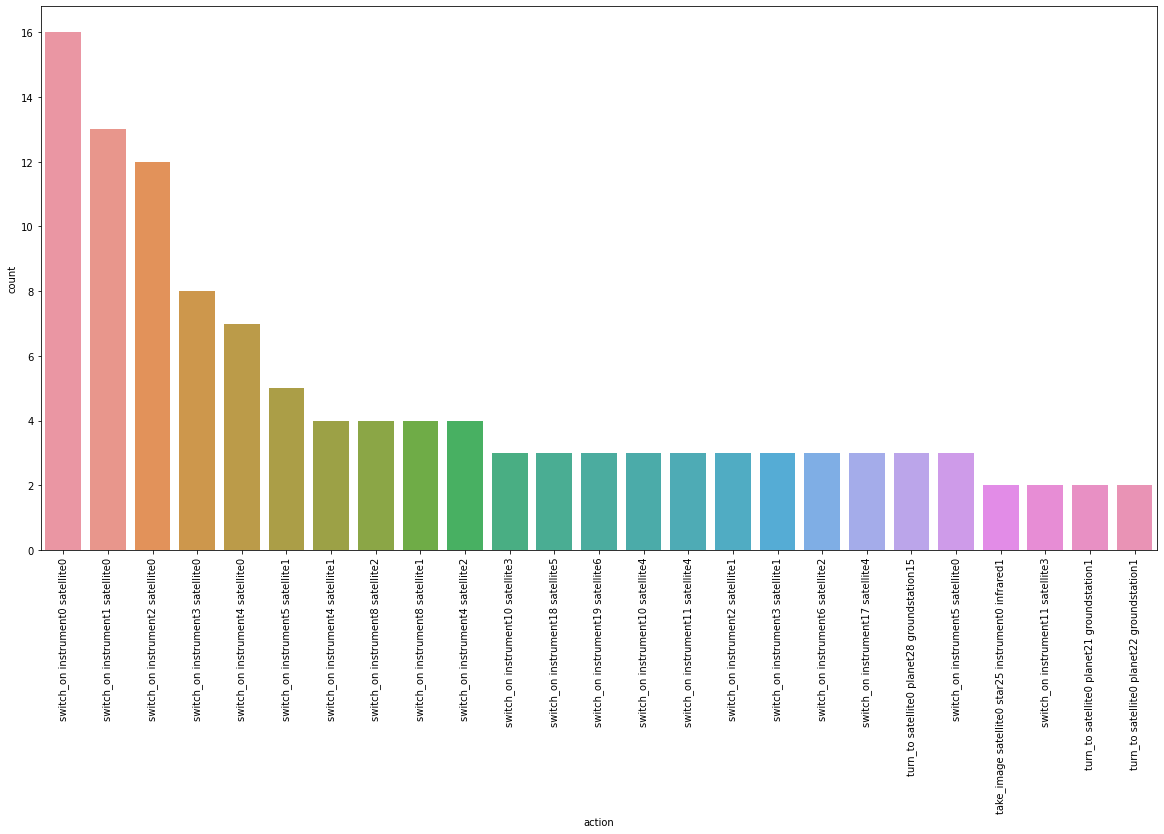

In [5]:
plt.figure(figsize=(20,10))
sns.barplot(data=most_frequent_actions(df_test["relaxed_plan"], 25),
            x="action",
            y="count")
plt.xticks(rotation=90)

## Frequent objects

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'satellite0'),
  Text(1, 0, 'satellite1'),
  Text(2, 0, 'instrument0'),
  Text(3, 0, 'satellite2'),
  Text(4, 0, 'instrument1'),
  Text(5, 0, 'instrument2'),
  Text(6, 0, 'instrument3'),
  Text(7, 0, 'satellite3'),
  Text(8, 0, 'star5'),
  Text(9, 0, 'star1'),
  Text(10, 0, 'star3'),
  Text(11, 0, 'groundstation4'),
  Text(12, 0, 'groundstation0'),
  Text(13, 0, 'star6'),
  Text(14, 0, 'instrument4'),
  Text(15, 0, 'star10'),
  Text(16, 0, 'star2'),
  Text(17, 0, 'star8'),
  Text(18, 0, 'groundstation2'),
  Text(19, 0, 'phenomenon10'),
  Text(20, 0, 'star7'),
  Text(21, 0, 'image0'),
  Text(22, 0, 'planet15'),
  Text(23, 0, 'spectrograph1'),
  Text(24, 0, 'star0')])

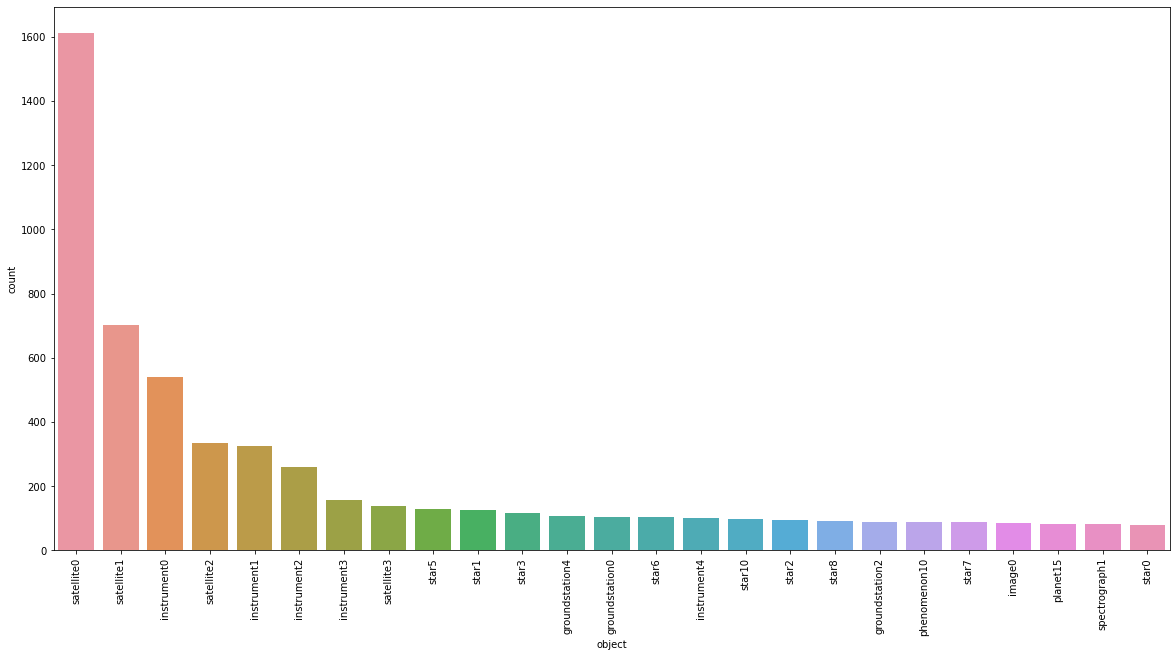

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(data=most_frequent_objects(df_train["relaxed_plan"], 25),
            x="object",
            y="count")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'satellite0'),
  Text(1, 0, 'satellite1'),
  Text(2, 0, 'satellite2'),
  Text(3, 0, 'satellite4'),
  Text(4, 0, 'satellite3'),
  Text(5, 0, 'instrument4'),
  Text(6, 0, 'satellite5'),
  Text(7, 0, 'instrument1'),
  Text(8, 0, 'satellite6'),
  Text(9, 0, 'instrument2'),
  Text(10, 0, 'instrument0'),
  Text(11, 0, 'instrument3'),
  Text(12, 0, 'instrument8'),
  Text(13, 0, 'instrument11'),
  Text(14, 0, 'star6'),
  Text(15, 0, 'groundstation15'),
  Text(16, 0, 'instrument5'),
  Text(17, 0, 'star19'),
  Text(18, 0, 'star26'),
  Text(19, 0, 'image3'),
  Text(20, 0, 'star29'),
  Text(21, 0, 'star21'),
  Text(22, 0, 'star25'),
  Text(23, 0, 'image2'),
  Text(24, 0, 'thermograph0')])

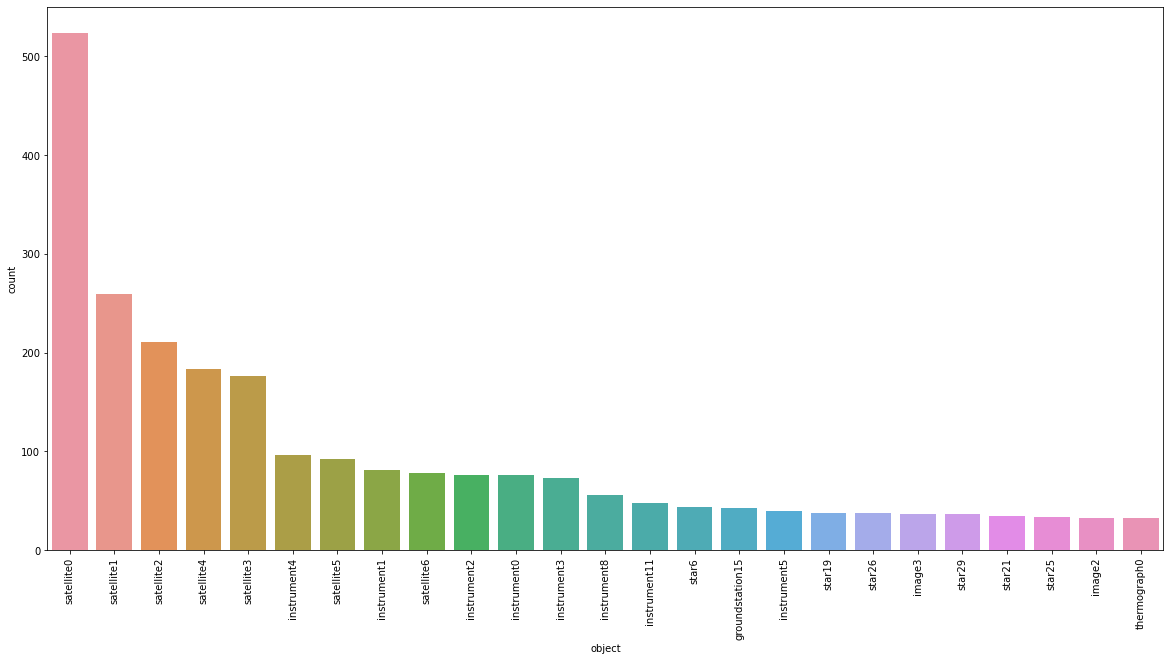

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(data=most_frequent_objects(df_test["relaxed_plan"], 25),
            x="object",
            y="count")
plt.xticks(rotation=90)

## Good actions that are contained in relaxed plans

In [8]:
(
    df_train[["good_operators", "relaxed_plan"]]
        .apply(lambda row: sum(action in row[0] for action in row[1]), axis=1)
        .to_frame()
        .rename(columns={0: "good_ops_in_relaxed"})
        .join(df_train["relaxed_plan"].apply(lambda plan: len(plan)))
        .describe()
)

,good_ops_in_relaxed,relaxed_plan
count,240.000000,240.000000
mean,7.608333,11.612500
std,4.601793,5.762003
min,0.000000,1.000000
25%,5.000000,6.000000
50%,6.000000,11.000000
75%,11.000000,16.000000
max,22.000000,24.000000


In [9]:
(
    df_test[["good_operators", "relaxed_plan"]]
        .apply(lambda row: sum(action in row[0] for action in row[1]), axis=1)
        .to_frame()
        .rename(columns={0: "good_ops_in_relaxed"})
        .join(df_test["relaxed_plan"].apply(lambda plan: len(plan)))
        .describe()
)

,good_ops_in_relaxed,relaxed_plan
count,48.000000,48.000000
mean,12.916667,31.895833
std,5.730966,7.677654
min,1.000000,19.000000
25%,9.000000,26.000000
50%,13.000000,29.500000
75%,16.000000,38.000000
max,25.000000,48.000000
